Datasets:

* [dc2012.arff](https://www.openml.org/search?type=data&status=active&id=42712): already in ARFF format
* [londonbike.zip](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset): convert to ARFF with routines in EDA section
* [chicagodivvy.zip](https://www.kaggle.com/datasets/yingwurenjian/chicago-divvy-bicycle-sharing-data): convert to ARFF with routines in EDA section

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display("text/html", "<style>.container { width:100% !important; }</style>")

# EDA

In [14]:
def flass(wut):
    import arff
    import pandas as pd
    data = arff.load(open(wut, 'r'))
    z = pd.DataFrame(data['data'])
    z.columns = [ v[0].lower() for v in data['attributes'] ]
    return z

## Chicago

In [2]:
def loadchicago():
    import arff
    import pandas as pd
    import zipfile
    
    goodcols = ['year','month', 'week', 'day', 'hour', 'temperature', 'events']
    
    with zipfile.ZipFile('chicagodivvy.zip') as myzip:
        with myzip.open('data.csv') as myfile:
            z = pd.read_csv(myfile)
            return z[goodcols].groupby(goodcols).size().to_frame(name='count').reset_index()

In [ ]:
def convertchicago(df):
    import arff

    def converttype(dtype):
        if dtype == 'int64':
            return 'INTEGER'
        elif dtype == 'float64':
            return 'REAL'
        elif dtype == 'O':
            return 'STRING'
        else:
            assert False
    
    rename = { 
        'cnt': 'count',
    }
    attributes = [(rename.get(c, c), converttype(df[j].dtypes)) for j, c in zip(df, df.columns.values) ]
    arff_dic = {
        'attributes': attributes,
        'data': df.values,
        'relation': 'myRel',
        'description': ''
    }

    with open("chicago.arff", "w", encoding="utf8") as f:
         arff.dump(arff_dic, f)
            
convertchicago(loadchicago())

In [4]:
flass('chicago.arff')

,year,month,week,day,hour,temperature,events,count
0,2014,1,1,2,1,10.9,not clear,10
1,2014,1,1,2,2,12.0,not clear,2
2,2014,1,1,2,3,14.0,not clear,3
3,2014,1,1,2,6,15.1,rain or snow,1
4,2014,1,1,2,7,17.1,rain or snow,4
...,...,...,...,...,...,...,...,...
34612,2017,12,52,6,17,7.0,cloudy,38
34613,2017,12,52,6,18,5.0,cloudy,27
34614,2017,12,52,6,20,1.9,clear,19
34615,2017,12,52,6,22,-0.0,clear,9


## London

In [ ]:
def loadlondon():
    import arff
    import pandas as pd
    import zipfile    
    with zipfile.ZipFile('londonbike.zip') as myzip:
        with myzip.open('london_merged.csv') as myfile:
            z = pd.read_csv(myfile)
            return z
        
loadlondon()

In [ ]:
def convertlondon(df):
    import arff

    def converttype(dtype):
        if dtype == 'int64':
            return 'INTEGER'
        elif dtype == 'float64':
            return 'REAL'
        elif dtype == 'O':
            return 'STRING'
        else:
            assert False
    
    rename = { 
        'cnt': 'count',
    }
    attributes = [(rename.get(c, c), converttype(df[j].dtypes)) for j, c in zip(df, df.columns.values) ]
    arff_dic = {
        'attributes': attributes,
        'data': df.values,
        'relation': 'myRel',
        'description': ''
    }

    with open("london.arff", "w", encoding="utf8") as f:
         arff.dump(arff_dic, f)
            
convertlondon(loadlondon())

In [72]:
flass('london.arff')

,timestamp,count,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


## Bike Sharing

In [66]:
flass('bikesharingdemand.arff')

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,casual,registered,count
0,spring,2011,1,0,0,6,0,clear,9.84,14.395,0.81,0.0000,3,13,16
1,spring,2011,1,1,0,6,0,clear,9.02,13.635,0.80,0.0000,8,32,40
2,spring,2011,1,2,0,6,0,clear,9.02,13.635,0.80,0.0000,5,27,32
3,spring,2011,1,3,0,6,0,clear,9.84,14.395,0.75,0.0000,3,10,13
4,spring,2011,1,4,0,6,0,clear,9.84,14.395,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,2012,12,19,0,1,1,misty,10.66,12.880,0.60,11.0014,11,108,119
17375,spring,2012,12,20,0,1,1,misty,10.66,12.880,0.60,11.0014,8,81,89
17376,spring,2012,12,21,0,1,1,clear,10.66,12.880,0.60,11.0014,7,83,90
17377,spring,2012,12,22,0,1,1,clear,10.66,13.635,0.56,8.9981,13,48,61


# Arff2Pytorch

In [1]:
import torch

class EasyAcc:
    def __init__(self):
        self.n = 0
        self.sum = 0
        self.sumsq = 0

    def __iadd__(self, other):
        import math
        if not math.isnan(other):
            self.n += 1
            self.sum += other
            self.sumsq += other*other
        return self

    def __isub__(self, other):
        import math
        if not math.isnan(other):
            self.n += 1
            self.sum -= other
            self.sumsq += other*other
        return self

    def mean(self):
        return self.sum / max(self.n, 1)

    def var(self):
        from math import sqrt
        return sqrt(self.sumsq / max(self.n, 1) - self.mean()**2)

    def semean(self):
        from math import sqrt
        return self.var() / sqrt(max(self.n, 1))

class EasyPoissonBootstrapAcc:
    def __init__(self, batch_size, confidence=0.95, seed=2112):
        from math import ceil
        from numpy.random import default_rng
        
        self.n = 0
        self.batch_size = batch_size
        self.confidence = confidence
        self.samples = [ EasyAcc() for _ in range(int(ceil(3 / (1 - self.confidence)))) ]
        self.rng = default_rng(seed)
        
    def __iadd__(self, other):
        self.n += 1
        
        poissons = self.rng.poisson(lam=self.batch_size, size=len(self.samples)) / self.batch_size
        
        for n, (chirp, acc) in enumerate(zip(poissons, self.samples)):
            acc += (chirp if n > 0 else 1) * other
            
        return self
         
    def __isub__(self, other):
        return self.__iadd__(-other)
    
    def ci(self):
        import numpy
        quantiles = numpy.quantile(a=[ x.mean() for x in self.samples ],
                                   q=[1 - self.confidence, 0.5, self.confidence])
        return list(quantiles)
    
    def formatci(self):
        z = self.ci()
        return '[{:<.4f},{:<.4f}]'.format(z[0], z[2])
    
class Schema(object):
    def __init__(self, *, attributes, target, skipcol, data):
        super().__init__()
        
        schema = {}
        n = 0
        for kraw, v in attributes:
            k = kraw.lower()

            if k in skipcol:
                continue
                
            if isinstance(v, str):
                if v in ['INTEGER', 'REAL']:
                    if any(thisv is None for row in data for thisk, thisv in zip(attributes, row) if thisk[0].lower() == k):
                        assert k != target, (k, target)
                        schema[k] = (lambda i: (lambda z: (i+1, 1) if z is None else (i, z)))(n)
                        n += 2
                    else:
                        schema[k] = (lambda i: (lambda z: (i, z)))(n)
                        n += 1
                elif k == 'date' or k == 'timestamp':
                    import ciso8601
                    import time
                    
                    schema[k] = (lambda i: (lambda z: (i, time.mktime(ciso8601.parse_datetime(z).timetuple()))))(n)
                    n += 1
                elif v == 'STRING':
                    uniques = set([ thisv for row in data for thisk, thisv in zip(attributes, row) if thisk[0].lower() == k ])
                    schema[k] =  (lambda h: (lambda z: (h[z], 1)))({ z: (n + m) for m, z in enumerate(uniques) })
                    n += len(uniques)
                else:
                    assert False, (k, v)
            elif isinstance(v, list) and all((isinstance(z, str) for z in v)):
                assert k != target, (k, target)
                schema[k] = (lambda h: (lambda z: (h[z], 1)))({ z: (n + m) for m, z in enumerate(v) })
                n += len(v)
            else:
                assert False
                
            if k == target:
                n -= 1
                
        assert target in schema, (target, attributes)
                
        self.schema = schema
        self.target = target
        self.nfeatures = n 
        
    def featurize(self, colname, val):
        if colname in self.schema:
            yield self.schema[colname](val)

def makeData(filename, *, target, skipcol, skiprow):
    import arff
    import numpy
    
    data = arff.load(open(filename, 'r'))
    schema = Schema(attributes=data['attributes'], target=target, skipcol=skipcol, data=data['data'])
    
    Y = []
    X = []
    
    for row in data['data']:
        hashrow = { kraw[0].lower(): v for kraw, v in zip(data['attributes'], row) }
        
        if skiprow(hashrow):
            continue
        
        y = None
        x = [0]*schema.nfeatures
        for col, val in hashrow.items():
            if col == target:
                y = next(schema.featurize(col, val))[1]
            else:
                for f, vf in schema.featurize(col, val):
                    from numbers import Number
                    assert isinstance(vf, Number), (col, val, f, vf)
                    x[f] = vf
                    
        Y.append(y)
        X.append(x)

    Y = numpy.array(Y)
    Ymin, Ymax = numpy.min(Y), numpy.max(Y)
    Y = (Y - Ymin) / (Ymax - Ymin)
    X = numpy.array(X)
    Xmin, Xmax = numpy.min(X, axis=0, keepdims=True), numpy.max(X, axis=0, keepdims=True)
    if numpy.any(Xmin >= Xmax):
        X = X[:,Xmin[0,:] < Xmax[0,:]]
        Xmin, Xmax = numpy.min(X, axis=0, keepdims=True), numpy.max(X, axis=0, keepdims=True)
    assert numpy.all(Xmax > Xmin), [ (col, lb, ub) for col, (lb, ub) in enumerate(zip(Xmin[0,:], Xmax[0,:])) if lb >= ub ]
    X = (X - Xmin) / (Xmax - Xmin)
    
    return X, Y

class ArffToPytorch(torch.utils.data.Dataset):
    def __init__(self, filename, *, target, skipcol=[], skiprow=(lambda z: False)):
        X, Y = makeData(filename, target=target, skipcol=skipcol, skiprow=skiprow)
        self.Xs = torch.Tensor(X)
        self.Ys = torch.Tensor(Y).unsqueeze(1)
            
    def __len__(self):
        return self.Xs.shape[0]

    def __getitem__(self, index):
        # Select sample
        return self.Xs[index], self.Ys[index]

# Supervised Learning

In [10]:
# best constant predictor
# if you don't beat this, you have a problem

def bestconstant(dataset):
    import numpy
        
    ymed = torch.median(dataset.Ys).item()
    ymedabsloss = torch.mean(torch.abs(dataset.Ys - ymed)).item()

    l1_loss = torch.nn.L1Loss(reduction='none')
    log_loss = torch.nn.BCELoss()
    sumabsloss, sumlogloss = EasyAcc(), EasyAcc()
    
    generator = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
    
    for _, Ys in generator:
        with torch.no_grad():
            yhat = torch.Tensor([ymed]).expand(*Ys.shape)
            loss = l1_loss(input=yhat, target=Ys)
            losspredict = torch.Tensor([ymedabsloss]).expand(*Ys.shape)
            loglosspredict = log_loss(input=losspredict, target=loss)
            
            sumabsloss += torch.mean(losspredict).item()
            sumlogloss += torch.mean(loglosspredict).item()
    
    return { 'best_constant_predict': ymed,
             'best_constant_loss_predict': ymedabsloss,
             'best_constant_average_reward': 1 - sumabsloss.mean(), 
             'best_constant_average_logloss': sumlogloss.mean(),
           }

bestconstant(ArffToPytorch('bikesharingdemand.arff', target='count'))

{'best_constant_predict': 0.14446721971035004,
 'best_constant_loss_predict': 0.14095699787139893,
 'best_constant_average_reward': 0.8590430021286011,
 'best_constant_average_logloss': 0.4066221208366401}

In [11]:
class LinearArgmax(torch.nn.Module):
    def __init__(self, dobs):
        super().__init__()
        
        self.linear = torch.nn.Linear(in_features=dobs, out_features=1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, Xs):
        return self.sigmoid(self.linear(Xs))

class CauchyRFF(torch.nn.Module):
    def __init__(self, dobs, numrff, sigma, device):
        from math import pi, sqrt
        
        super().__init__()
        
        self.rffW = torch.nn.Parameter(torch.empty(dobs, numrff).cauchy_(sigma = sigma).to(device), 
                                       requires_grad=False)
        self.rffb = torch.nn.Parameter((2 * pi * torch.rand(numrff)).to(device),
                                       requires_grad=False)
        self.sqrtrff = torch.nn.Parameter(torch.Tensor([sqrt(numrff)]).to(device), 
                                          requires_grad=False)
        self.linear = torch.nn.Linear(in_features=numrff, out_features=1, device=device)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, Xs):
        with torch.no_grad():
            rff = (torch.matmul(Xs, self.rffW) + self.rffb).cos() / self.sqrtrff
            
        return self.sigmoid(self.linear(rff))
    
def learnOnline(dataset, *, seed, batch_size, initlr, tzero, modelfactory):
    import time
    
    torch.manual_seed(seed)
        
    generator = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = None
    l1_loss = torch.nn.L1Loss()
    
    print('{:<5s}\t{:<8s}\t{:<8s}\t{:<8s}\t{:<8s}\t{:<8s}'.format('n', 'loss', 'since last', 'acc', 'acc since last', 'dt (sec)'),
          flush=True)
    avloss, acc, sincelast, accsincelast = EasyAcc(), EasyAcc(), EasyAcc(), EasyAcc()
    
    for bno, (Xs, ys) in enumerate(generator):
        if model is None:
            from math import sqrt
            model = modelfactory(Xs.shape[1])
            opt = torch.optim.Adam(( p for p in model.parameters() if p.requires_grad ), lr=initlr)
            scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda = lambda t: sqrt(tzero) / sqrt(tzero + t))
            start = time.time()
            
        opt.zero_grad()
        
        yhat = model(Xs)
        loss = l1_loss(yhat, ys)
        loss.backward()
        opt.step()
        scheduler.step()
        
        with torch.no_grad():
            acc += torch.mean((torch.abs(yhat - ys) <= 0.1).float())
            accsincelast += torch.mean((torch.abs(yhat - ys) <= 0.1).float())
            avloss += loss
            sincelast += loss

        if bno & (bno - 1) == 0:
            print('{:<5d}\t{:<8.5f}\t{:<8.5f}\t{:<8.5f}\t{:<8.5f}\t{:<8.5f}'.format(
                    avloss.n, avloss.mean(), sincelast.mean(), acc.mean(), accsincelast.mean(), time.time() - start), 
                  flush=True)
            sincelast, accsincelast = EasyAcc(), EasyAcc()

    print('{:<5d}\t{:<8.5f}\t{:<8.5f}\t{:<8.5f}\t{:<8.5f}\t{:<8.5f}'.format(
            avloss.n, avloss.mean(), sincelast.mean(), acc.mean(), accsincelast.mean(), time.time() - start), 
          flush=True)

In [12]:
mydata = ArffToPytorch('bikesharingdemand.arff', target='count')

In [13]:
learnOnline(mydata, seed=4545, batch_size=1, initlr=1e-2, tzero=100, modelfactory=lambda x: LinearArgmax(dobs=x))

n    	loss    	since last	acc     	acc since last	dt (sec)
1    	0.56430 	0.56430 	0.00000 	0.00000 	0.17370 
2    	0.34986 	0.13541 	0.00000 	0.00000 	0.17889 
3    	0.37006 	0.41048 	0.00000 	0.00000 	0.18068 
5    	0.31444 	0.23100 	0.20000 	0.50000 	0.18311 
9    	0.32553 	0.33940 	0.11111 	0.00000 	0.18714 
17   	0.26955 	0.20657 	0.11765 	0.12500 	0.19272 
33   	0.23044 	0.18887 	0.21212 	0.31250 	0.20778 
65   	0.20346 	0.17564 	0.24615 	0.28125 	0.24264 
129  	0.17264 	0.14134 	0.33333 	0.42188 	0.29994 
257  	0.15892 	0.14510 	0.40467 	0.47656 	0.39948 
513  	0.13541 	0.11181 	0.47953 	0.55469 	0.57613 
1025 	0.11255 	0.08965 	0.56683 	0.65430 	0.82877 
2049 	0.09172 	0.07087 	0.66813 	0.76953 	1.30280 
4097 	0.07220 	0.05268 	0.77715 	0.88623 	2.25181 
8193 	0.05589 	0.03957 	0.87392 	0.97070 	4.28559 
16385	0.04423 	0.03257 	0.93555 	0.99719 	8.30233 
17379	0.04344 	0.03037 	0.93918 	0.99899 	8.78822 


In [14]:
learnOnline(mydata, seed=4545, batch_size=1, initlr=1e-2, tzero=100, 
            modelfactory=lambda x: CauchyRFF(dobs=x, numrff=1024, sigma=1/10, device='cpu'))

n    	loss    	since last	acc     	acc since last	dt (sec)
1    	0.49805 	0.49805 	0.00000 	0.00000 	0.00631 
2    	0.28694 	0.07582 	0.50000 	1.00000 	0.00924 
3    	0.33834 	0.44114 	0.33333 	0.00000 	0.01313 
5    	0.28489 	0.20471 	0.40000 	0.50000 	0.01629 
9    	0.29312 	0.30341 	0.22222 	0.00000 	0.02419 
17   	0.22303 	0.14418 	0.29412 	0.37500 	0.03327 
33   	0.17277 	0.11936 	0.36364 	0.43750 	0.04596 
65   	0.16483 	0.15665 	0.46154 	0.56250 	0.06657 
129  	0.14459 	0.12403 	0.48837 	0.51562 	0.11263 
257  	0.12979 	0.11488 	0.54864 	0.60938 	0.21041 
513  	0.10791 	0.08593 	0.64327 	0.73828 	0.38694 
1025 	0.08299 	0.05802 	0.75415 	0.86523 	0.68313 
2049 	0.06517 	0.04733 	0.83748 	0.92090 	1.33278 
4097 	0.05089 	0.03661 	0.89871 	0.95996 	2.60740 
8193 	0.03938 	0.02786 	0.94019 	0.98169 	5.05225 
16385	0.03055 	0.02171 	0.96564 	0.99109 	10.08077
17379	0.02988 	0.01889 	0.96720 	0.99296 	10.62600


# Bandit Feedback

| dataset | $q$ | Avg. Profit | Sold Out (%) | 
| --- | --- | --- | --- |
| DC | 0.2 | [7.82,8.09] | [30.72,31.51] | 
| DC | 0.5 | [9.88,10.23] | [18.92,19.54] | 
| London | 0.2 | [3.52,3.63] | [56.35,57.85]  | 
| London | 0.5 | [4.75,4.95]  | [28.15,29.08]  |
| Chicago | 0.2 | [2.17,2.26] | [50.02,50.77] | 
| Chicago | 0.5 | [3.73,3.83] | [20.01,20.39] |

In [46]:
def profit(allocated, demand, *, cost, price):
    assert price > cost, (price, cost)
    return price * torch.clip(demand, max=allocated) - cost * allocated

class CauchyTruncatedNormal(torch.nn.Module):
    def __init__(self, dobs, numrff, sigma, device, cost, price, approxargmax):
        from math import pi, sqrt
        
        super().__init__()
        
        self.rffW = torch.nn.Parameter(torch.empty(dobs, numrff).cauchy_(sigma = sigma).to(device), 
                                       requires_grad=False)
        self.rffb = torch.nn.Parameter((2 * pi * torch.rand(numrff)).to(device),
                                       requires_grad=False)
        self.sqrtrff = torch.nn.Parameter(torch.Tensor([sqrt(numrff)]).to(device), 
                                          requires_grad=False)
        self.linear = torch.nn.Linear(in_features=numrff, out_features=2, device=device)
        self.sigmoid = torch.nn.Sigmoid()
        self.softplus = torch.nn.Softplus()
        self.cost = cost
        self.price = price
        self.approxargmax = approxargmax
        
    def distparams(self, Xs):
        with torch.no_grad():
            rff = (torch.matmul(Xs, self.rffW) + self.rffb).cos() / self.sqrtrff
            
        pre = self.linear(rff)
        return self.sigmoid(pre[:,0:1]), 0.01 + self.softplus(pre[:,1:2])
    
    def forward(self, Xs, As):
        from math import pi, sqrt
        
        mu, sigma = self.distparams(Xs)
        dens = torch.erf((1 - mu) / sigma) + torch.erf(mu / sigma)
        nums = (
              (sigma / sqrt(pi)) * (torch.exp(-torch.square(mu) / torch.square(sigma)) - torch.exp(-torch.square(mu - As) / torch.square(sigma)))
            + As * torch.erf((1 - mu) / sigma)
            + (mu - As) * torch.erf((As - mu) / sigma)
            + mu * torch.erf(mu / sigma)
        )
        return -self.cost * As + self.price * nums / dens
    
    def argmaxone(self, mu, sigma):
        from math import erf, exp, pi, sqrt
        import scipy.optimize as so
        
        dens = erf((1 - mu) / sigma) + erf(mu / sigma)
        
        def fun(z):
            nums = (
                (sigma / sqrt(pi)) * (exp(-mu**2 / sigma**2) - exp(-(mu - z)**2 / sigma**2))
                + z * erf((1 - mu) / sigma)
                + (mu - z) * erf((z - mu) / sigma)
                + mu * erf(mu / sigma)
            )                         
            return self.cost * z - self.price * nums / dens
        
        const = erf((1 - mu) / sigma)
        res = so.minimize_scalar(fun=fun, bounds=[0, 1], method='bounded')
        assert res.success, res
        return res.x

    def argmax(self, Xs, resolution):
        with torch.no_grad():
            if self.approxargmax:
                from math import ceil
                nsamples = int(ceil(1/resolution))
                As = torch.rand(size=(Xs.shape[0], nsamples), device=Xs.device)
                weirdrv = torch.max(input=self.forward(Xs, As), dim=1, keepdim=True)
                fhatstar = weirdrv.values
                ahatstar = torch.gather(input=As, dim=1, index=weirdrv.indices)
                return fhatstar, ahatstar
            else:
                mu, sigma = self.distparams(Xs)
                ahatstar = torch.Tensor([ [ self.argmaxone(m.item(), s.item()) ] for m, s in zip(mu, sigma) ])
                return self.forward(Xs, ahatstar), ahatstar

class CorralIGW(object):
    def __init__(self, *, eta, gammamin, gammamax, nalgos, device):
        import numpy
        
        super().__init__()
        
        self.eta = eta / nalgos
        self.gammas = torch.Tensor(numpy.geomspace(gammamin, gammamax, nalgos)).to(device)
        self.invpalgo = torch.Tensor([ self.gammas.shape[0] ] * self.gammas.shape[0]).to(device)
        
    def update(self, algo, invprop, reward):
        import numpy
        from scipy import optimize
                
        weightedlosses = self.eta * (-reward.squeeze(1)) * invprop.squeeze(1)
        newinvpalgo = torch.scatter(input=self.invpalgo,
                                    dim=0,
                                    index=algo,
                                    src=weightedlosses,
                                    reduce='add')
                                    
        # just do this calc on the cpu
        invp = newinvpalgo.cpu().numpy() 
        invp += 1 - numpy.min(invp)
        Zlb = 0
        Zub = 1
        while (numpy.sum(1 / (invp + Zub)) > 1):
            Zlb = Zub
            Zub *= 2 
        root, res = optimize.brentq(lambda z: 1 - numpy.sum(1 / (invp + z)), Zlb, Zub, full_output=True)
        assert res.converged, res
        
        self.invpalgo = torch.Tensor(invp + root, device=self.invpalgo.device)

    def sample(self, fhat, X):
        N, _ = X.shape

        algosampler = torch.distributions.categorical.Categorical(probs=1.0/self.invpalgo, validate_args=False)
        algo = algosampler.sample((N,))
        invpalgo = torch.gather(input=self.invpalgo.unsqueeze(0).expand(N, -1),
                                dim=1,
                                index=algo.unsqueeze(1))
        gamma = torch.gather(input=self.gammas.unsqueeze(0).expand(N, -1),
                             dim=1,
                             index=algo.unsqueeze(1))
        resolution = 1 / torch.max(gamma).item()
        fhatstar, ahatstar = fhat.argmax(X, resolution)
        
        rando = torch.rand(size=(N, 1), device=X.device)
        fhatrando = fhat(X, rando)
        probs = 1 / (1 + gamma * torch.clip(fhatstar - fhatrando, min=0))
        unif = torch.rand(size=(N, 1), device=X.device)
        shouldexplore = (unif <= probs).long()
        return (ahatstar + shouldexplore * (rando - ahatstar)), algo, invpalgo, shouldexplore, ahatstar

def bestconstant(dataset, *, cost, price):
    import numpy
        
    constreward = [EasyAcc() for _ in range(100)]
    punder = [EasyAcc() for _ in range(100)]
    generator = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
    
    for _, Ys in generator:
        with torch.no_grad():
            for n in range(len(constreward)):
                z = n / len(constreward)
                constreward[n] += torch.mean(profit(z, Ys, cost=cost, price=price)).item()
                punder[n] += torch.mean((z < Ys).float()).item()
    
    return { 'best_constant_reward': max(( (v.mean(), punder[n].mean(), n/len(constreward)) for n, v in enumerate(constreward) ))
           }

def bootstrap(data, stat, conf):
    from math import ceil
    import numpy as np
    
    samples = ceil(3 / conf)
    stats = []
    for _ in range(samples):
        stats.append(stat(np.random.choice(data, len(data))))
        
    return np.quantile(stats, q=[conf, 1-conf])
            
def compute_evar_ci(rewards, q):
    import numpy as np
    
    def f(m, data):
        return q * np.sum(np.square(np.clip(data - m, a_min=0, a_max=None))) + (1 - q) * np.sum(np.square(np.clip(m - data, a_min=0, a_max=None)))  
            
    def evar(data):
        from scipy.optimize import minimize_scalar
        res = minimize_scalar(lambda m: f(m, data), bounds=(np.min(data), np.max(data)), method='bounded')
        assert res.success
        return res.x
    
    return bootstrap(rewards, evar, conf=0.05)
        
def learnOnline(dataset, *, q, seed, batch_size, modelfactory, initlr, tzero, eta, gammamin, gammamax, nalgos, cost, price):
    import numpy as np
    import time
    
    torch.manual_seed(seed)
        
    generator = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = None
    l1_loss = torch.nn.L1Loss(reduction='none')
    squared_loss = torch.nn.MSELoss(reduction='none')
    
    print('{:<5s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<10s}'.format(
            'n', 'loss', 'since last', 'rahat', 'since last', f'evarq({q})', 'since last', 'punder', 'since last', 'accept', 'since last', 'dt (sec)'),
          flush=True)
    avloss, sincelast, acc, accsincelast, avreward, rewardsincelast = [ 
        EasyPoissonBootstrapAcc(batch_size=batch_size) for _ in range(6) ]
    accept, acceptsincelast, punder, pundersincelast = [
        EasyPoissonBootstrapAcc(batch_size=batch_size) for _ in range(4) ]
    allrewards, allrewardssincelast, punders = [], [], []
    
    for bno, (Xs, ys) in enumerate(generator):
        if model is None:
            from math import sqrt
            model = modelfactory(Xs)
            opt = torch.optim.Adam(( p for p in model.parameters() if p.requires_grad ), lr=initlr)
            scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda = lambda t: sqrt(tzero) / sqrt(tzero + t))
            sampler = CorralIGW(eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, device=Xs.device)
            start = time.time()
            
        opt.zero_grad()
        
        with torch.no_grad():
            sample, algo, invpalgo, shouldexplore, ahatstar = sampler.sample(model, Xs)
            reward = profit(sample, ys, cost=cost, price=price)
            allrewards.append(reward.numpy())
            allrewardssincelast.append(reward.numpy())
            rahat = profit(ahatstar, ys, cost=cost, price=price)
        
        score = model(Xs, sample)
        with torch.no_grad():
            factor = q * (score < reward).long() + (1 - q) * (score >= reward).long()
        loss = 2 * torch.mean(factor * squared_loss(score, reward))
        loss.backward()
        opt.step()
        scheduler.step()
        
        with torch.no_grad():
            acc += torch.mean(rahat).item()
            accsincelast += torch.mean(rahat).item()
            avreward += torch.mean(reward).item()
            rewardsincelast += torch.mean(reward).item()
            punder += torch.mean((sample < ys).float()).item()
            pundersincelast += torch.mean((sample < ys).float()).item()
            avloss += loss.item()
            sincelast += loss.item()
            accept += torch.mean(shouldexplore.float()).item()
            acceptsincelast += torch.mean(shouldexplore.float()).item()
            sampler.update(algo, invpalgo, reward)

        if bno & (bno - 1) == 0:
            evar = compute_evar_ci(np.concatenate(allrewards, axis=None), q)
            evarsincelast = compute_evar_ci(np.concatenate(allrewardssincelast, axis=None), q)
            punders.append((bno, punder.ci()))
            
            print('{:<5d}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<10.5f}'.format(
                    avloss.n, avloss.formatci(), sincelast.formatci(), acc.formatci(),
                    accsincelast.formatci(), f'[{evar[0]:.4f},{evar[1]:.4f}]', f'[{evarsincelast[0]:.4f},{evarsincelast[1]:.4f}]',
                    punder.formatci(), pundersincelast.formatci(),
                    accept.formatci(), acceptsincelast.formatci(),
                    time.time() - start),
                  flush=True)
            sincelast, accsincelast, rewardsincelast, acceptsincelast, pundersincelast = [ 
                EasyPoissonBootstrapAcc(batch_size=batch_size) for _ in range(5) ]
            allrewardssincelast = []
            print(f'sampler.palgo = { 1/sampler.invpalgo }')

    evar = compute_evar_ci(np.concatenate(allrewards, axis=None), q)
    evarsincelast = compute_evar_ci(np.concatenate(allrewardssincelast, axis=None), q)
    punders.append((bno, punder.ci()))
    print('{:<5d}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<17s}\t{:<10.5f}'.format(
            avloss.n, avloss.formatci(), sincelast.formatci(), acc.formatci(),
            accsincelast.formatci(), f'[{evar[0]:.4f},{evar[1]:.4f}]', f'[{evarsincelast[0]:.4f},{evarsincelast[1]:.4f}]',
            punder.formatci(), pundersincelast.formatci(),
            accept.formatci(), acceptsincelast.formatci(),
            time.time() - start),
          flush=True)
    print(f'sampler.palgo = { 1/sampler.invpalgo }')
    print(f'0.2: {compute_evar_ci(np.concatenate(allrewards, axis=None), 0.2)} 0.5: {compute_evar_ci(np.concatenate(allrewards, axis=None), 0.5)}')
    return punders

## Chicago

In [87]:
mydata = ArffToPytorch('chicago.arff', target='count')
bestconstant(mydata, cost=1/3, price=1)

{'best_constant_reward': (0.02581233765993202, 0.32454251386431804, 0.13)}

### risk-neutral

In [88]:
def doit():
    # see tune-biking-expectile.*.res
    initlr, tzero, eta, gammamin, gammamax, nalgos = 0.039249862458051156, 8.149927760620125, 0.4594617772043446, 8, 1024, 4
    cost, price = 1/3, 1
    
    learnOnline(mydata, seed=4545, q=0.5, initlr=initlr, tzero=tzero, batch_size=8, 
                eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, cost=cost, price=price,
                modelfactory=lambda x: CauchyTruncatedNormal(dobs=x.shape[1], numrff=1024, sigma=1/10, device='cpu', cost=cost, price=price, approxargmax=True))
doit()

n    	loss             	since last       	rahat            	since last       	evarq(0.5)       	since last       	punder           	since last       	accept           	since last       	dt (sec)  
1    	[0.0508,0.2033]  	[0.0508,0.2033]  	[-0.2333,-0.0583]	[-0.2333,-0.0583]	[-0.1912,-0.0734]	[-0.1865,-0.0993]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.1406,0.5625]  	[0.1406,0.5625]  	0.15077   
sampler.palgo = tensor([0.2494, 0.2492, 0.2478, 0.2536])
2    	[0.0767,0.1959]  	[0.0514,0.2057]  	[-0.2271,-0.0891]	[-0.2411,-0.0603]	[-0.1839,-0.1085]	[-0.1901,-0.1199]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.1719,0.4535]  	[0.0938,0.3750]  	0.27002   
sampler.palgo = tensor([0.2583, 0.2519, 0.2511, 0.2387])
3    	[0.0817,0.1681]  	[0.0395,0.1578]  	[-0.2046,-0.0998]	[-0.2090,-0.0523]	[-0.1705,-0.1190]	[-0.1541,-0.0933]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.2812,0.5690]  	[0.2344,0.9375]  	0.39572   
sampler.palgo = tensor([0.2604, 0.2552, 0.2487, 0.2357])
5    	[0.0710,0.1217]  	[0.0243,0.0656]  

### risk-averse

In [89]:
def doit():
    # see tune-biking-expectile.*.res
    initlr, tzero, eta, gammamin, gammamax, nalgos = 0.049873098247357875, 1.7785963392968864, 0.7748845548802411, 8, 2048, 6
    cost, price = 1/3, 1
    
    learnOnline(mydata, seed=4545, q=0.2, initlr=initlr, tzero=tzero, batch_size=8, 
                eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, cost=cost, price=price,
                modelfactory=lambda x: CauchyTruncatedNormal(dobs=x.shape[1], numrff=1024, sigma=1/10, device='cpu', cost=cost, price=price, approxargmax=True))
doit()

n    	loss             	since last       	rahat            	since last       	evarq(0.2)       	since last       	punder           	since last       	accept           	since last       	dt (sec)  
1    	[0.0816,0.3266]  	[0.0816,0.3266]  	[-0.2335,-0.0584]	[-0.2335,-0.0584]	[-0.1938,-0.1548]	[-0.1929,-0.1468]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.1875,0.7500]  	[0.1875,0.7500]  	0.13716   
sampler.palgo = tensor([0.1640, 0.1643, 0.1707, 0.1630, 0.1707, 0.1672])
2    	[0.1177,0.3026]  	[0.0760,0.3039]  	[-0.2275,-0.0892]	[-0.2415,-0.0604]	[-0.1928,-0.1495]	[-0.1914,-0.1616]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.1637,0.4535]  	[0.0469,0.1875]  	0.26740   
sampler.palgo = tensor([0.1682, 0.1685, 0.1729, 0.1592, 0.1678, 0.1635])
3    	[0.1337,0.2767]  	[0.0714,0.2855]  	[-0.2055,-0.1004]	[-0.2122,-0.0531]	[-0.1835,-0.1548]	[-0.1787,-0.1461]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.1872,0.3971]  	[0.0938,0.3750]  	0.39766   
sampler.palgo = tensor([0.1697, 0.1664, 0.1691, 0.1630, 0.1644, 0.

## London

In [92]:
mydata = ArffToPytorch('london.arff', target='count')
bestconstant(mydata, cost=1/3, price=1)

{'best_constant_reward': (0.04380489668783245, 0.33071483182250905, 0.17)}

### risk-neutral

In [93]:
def doit():
    # see tune-biking-expectile.*.res
    initlr, tzero, eta, gammamin, gammamax, nalgos = 0.015162208381891886, 6.286877164763437, 0.9636644839634085, 16, 4096, 4
    cost, price = 1/3, 1
    
    learnOnline(mydata, seed=4545, q=0.5, initlr=initlr, tzero=tzero, batch_size=8, 
                eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, cost=cost, price=price,
                modelfactory=lambda x: CauchyTruncatedNormal(dobs=x.shape[1], numrff=1024, sigma=1/10, device='cpu', cost=cost, price=price, approxargmax=True))
doit()

n    	loss             	since last       	rahat            	since last       	evarq(0.5)       	since last       	punder           	since last       	accept           	since last       	dt (sec)  
1    	[0.0407,0.1628]  	[0.0407,0.1628]  	[-0.1450,-0.0363]	[-0.1450,-0.0363]	[-0.1521,-0.0543]	[-0.1459,-0.0658]	[0.0469,0.1875]  	[0.0469,0.1875]  	[0.0938,0.3750]  	[0.0938,0.3750]  	0.14097   
sampler.palgo = tensor([0.2546, 0.2512, 0.2415, 0.2527])
2    	[0.0562,0.1455]  	[0.0349,0.1397]  	[-0.1375,-0.0537]	[-0.1419,-0.0355]	[-0.1258,-0.0305]	[-0.1513,0.0176] 	[0.0234,0.0938]  	[0.0000,0.0000]  	[0.1719,0.4457]  	[0.1406,0.5625]  	0.26526   
sampler.palgo = tensor([0.2625, 0.2530, 0.2340, 0.2505])
3    	[0.0545,0.1151]  	[0.0219,0.0875]  	[-0.0792,-0.0181]	[0.0160,0.0640]  	[-0.0860,0.0040] 	[-0.0799,0.1148] 	[0.0156,0.0625]  	[0.0000,0.0000]  	[0.1820,0.3812]  	[0.0938,0.3750]  	0.41818   
sampler.palgo = tensor([0.2771, 0.2595, 0.2199, 0.2435])
5    	[0.0698,0.1201]  	[0.0629,0.1649]  

### risk-averse

In [94]:
def doit():
    # see tune-biking-expectile.*.res
    initlr, tzero, eta, gammamin, gammamax, nalgos = 0.02892759212511789, 5.014926693720849, 0.41488348196455327, 16, 4096, 4 
    cost, price = 1/3, 1

    learnOnline(mydata, seed=4545, q=0.2, initlr=initlr, tzero=tzero, batch_size=8, 
                eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, cost=cost, price=price,
                modelfactory=lambda x: CauchyTruncatedNormal(dobs=x.shape[1], numrff=1024, sigma=1/10, device='cpu', cost=cost, price=price, approxargmax=True))
doit()

n    	loss             	since last       	rahat            	since last       	evarq(0.2)       	since last       	punder           	since last       	accept           	since last       	dt (sec)  
1    	[0.0651,0.2605]  	[0.0651,0.2605]  	[-0.1450,-0.0363]	[-0.1450,-0.0363]	[-0.1656,-0.0921]	[-0.1719,-0.1117]	[0.0469,0.1875]  	[0.0469,0.1875]  	[0.0938,0.3750]  	[0.0938,0.3750]  	0.14577   
sampler.palgo = tensor([0.2520, 0.2505, 0.2463, 0.2512])
2    	[0.0884,0.2293]  	[0.0539,0.2158]  	[-0.1367,-0.0534]	[-0.1402,-0.0350]	[-0.1628,-0.1033]	[-0.1749,-0.0908]	[0.0234,0.0938]  	[0.0000,0.0000]  	[0.1719,0.4457]  	[0.1406,0.5625]  	0.27650   
sampler.palgo = tensor([0.2605, 0.2464, 0.2430, 0.2502])
3    	[0.0840,0.1794]  	[0.0321,0.1284]  	[-0.0774,-0.0163]	[0.0175,0.0700]  	[-0.1391,-0.0972]	[-0.1408,0.0634] 	[0.0156,0.0625]  	[0.0000,0.0000]  	[0.1820,0.3812]  	[0.0938,0.3750]  	0.42670   
sampler.palgo = tensor([0.2667, 0.2495, 0.2365, 0.2473])
5    	[0.1005,0.1694]  	[0.0766,0.1996]  

## DC 2012

In [7]:
mydata = ArffToPytorch('dc2012.arff', target='count')
bestconstant(mydata, cost=1/3, price=1)

{'best_constant_reward': (0.05713017879101886, 0.33249080882352944, 0.23)}

### risk-neutral

In [47]:
def doit():
    # see tune-biking-expectile.*.res
    initlr, tzero, eta, gammamin, gammamax, nalgos = 0.035973578465496724, 3.187013211955139, 0.8712958132211441, 8, 4096, 4
    cost, price = 1/3, 1
    
    return learnOnline(mydata, seed=4545, q=0.5, initlr=initlr, tzero=tzero, batch_size=8, 
                eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, cost=cost, price=price,
                modelfactory=lambda x: CauchyTruncatedNormal(dobs=x.shape[1], numrff=1024, sigma=1/10, device='cpu', cost=cost, price=price, approxargmax=True))

neutralpunders = doit()

n    	loss             	since last       	rahat            	since last       	evarq(0.5)       	since last       	punder           	since last       	accept           	since last       	dt (sec)  
1    	[0.0470,0.1879]  	[0.0470,0.1879]  	[-0.1104,-0.0276]	[-0.1104,-0.0276]	[-0.1795,0.0192] 	[-0.1802,0.0251] 	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.0469,0.1875]  	[0.0469,0.1875]  	0.15675   
sampler.palgo = tensor([0.2578, 0.2394, 0.2375, 0.2654])
2    	[0.0529,0.1414]  	[0.0259,0.1036]  	[-0.0623,-0.0218]	[-0.0169,-0.0042]	[-0.1049,0.0098] 	[-0.1021,0.0941] 	[0.0312,0.0941]  	[0.0469,0.1875]  	[0.1090,0.2656]  	[0.0938,0.3750]  	0.29408   
sampler.palgo = tensor([0.2591, 0.2402, 0.2440, 0.2567])
3    	[0.0666,0.1401]  	[0.0401,0.1602]  	[-0.0799,-0.0402]	[-0.1362,-0.0340]	[-0.1025,-0.0150]	[-0.1728,-0.0008]	[0.0570,0.1201]  	[0.0469,0.1875]  	[0.1661,0.3596]  	[0.1406,0.5625]  	0.43858   
sampler.palgo = tensor([0.2816, 0.2276, 0.2269, 0.2638])
5    	[0.0650,0.1129]  	[0.0396,0.1002]  

### risk-averse

In [48]:
def doit():
    # see tune-biking-expectile.*.res
    initlr, tzero, eta, gammamin, gammamax, nalgos = 0.03956762604016887, 2.508523593579849, 0.7535176557078329, 32, 4096, 6
    cost, price = 1/3, 1
    
    return learnOnline(mydata, seed=4545, q=0.2, initlr=initlr, tzero=tzero, batch_size=8, 
                eta=eta, gammamin=gammamin, gammamax=gammamax, nalgos=nalgos, cost=cost, price=price,
                modelfactory=lambda x: CauchyTruncatedNormal(dobs=x.shape[1], numrff=1024, sigma=1/10, device='cpu', cost=cost, price=price, approxargmax=True))

aversepunders = doit()

n    	loss             	since last       	rahat            	since last       	evarq(0.2)       	since last       	punder           	since last       	accept           	since last       	dt (sec)  
1    	[0.0750,0.3000]  	[0.0750,0.3000]  	[-0.1104,-0.0276]	[-0.1104,-0.0276]	[-0.2052,-0.0892]	[-0.2091,-0.0690]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.0469,0.1875]  	[0.0469,0.1875]  	0.14608   
sampler.palgo = tensor([0.1687, 0.1660, 0.1643, 0.1643, 0.1666, 0.1700])
2    	[0.0874,0.2324]  	[0.0449,0.1794]  	[-0.0622,-0.0218]	[-0.0168,-0.0042]	[-0.1584,-0.0690]	[-0.1470,-0.0039]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.0703,0.1797]  	[0.0469,0.1875]  	0.36072   
sampler.palgo = tensor([0.1686, 0.1663, 0.1646, 0.1680, 0.1658, 0.1667])
3    	[0.1069,0.2266]  	[0.0626,0.2502]  	[-0.0795,-0.0399]	[-0.1345,-0.0336]	[-0.1606,-0.0900]	[-0.1802,-0.0737]	[0.0000,0.0000]  	[0.0000,0.0000]  	[0.1716,0.3654]  	[0.1875,0.7500]  	0.57590   
sampler.palgo = tensor([0.1678, 0.1723, 0.1626, 0.1666, 0.1617, 0.

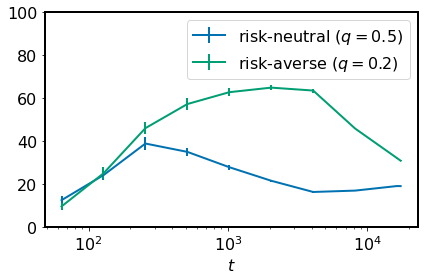

In [97]:
def flass():    
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('seaborn-colorblind')
    minbatch = 7
    
    plt.errorbar(x=[8*x[0] for x in neutralpunders if x[0] > minbatch ], 
                 y=[ 50*(x[1][0]+x[1][1]) for x in neutralpunders if x[0] > minbatch ], 
                 yerr=[ 50*(x[1][1]-x[1][0]) for x in neutralpunders if x[0] > minbatch ],
                 label='risk-neutral ($q=0.5$)',
                 linewidth=2)
    plt.errorbar(x=[8*x[0] for x in aversepunders if x[0] > minbatch ], 
                 y=[ 50*(x[1][0]+x[1][1]) for x in aversepunders if x[0] > minbatch ], 
                 yerr=[ 50*(x[1][1]-x[1][0]) for x in aversepunders if x[0] > minbatch ],
                 label='risk-averse ($q=0.2$)',
                 linewidth=2)
    plt.xscale('log')
    plt.xlabel('$t$', fontsize=16)
    plt.ylim([0, 100])
    #plt.title('Cumulative Sell Out (%), DC Dataset', fontsize=14)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.setp(plt.gca().spines.values(), linewidth=2)
    plt.tight_layout()
    plt.savefig('dcsellout.pdf')  
    
flass()